# <center> CS 301 Project - Group 086 </center>
## <center> Project Codes </center>
### <center> Ege Demirci (28287) - Efe Tüzün (28992) </center>

In [1]:
# Importing Necessary Packages
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from scipy.stats import t
from scipy import stats
import pandas as pd
import numpy as np
import statistics
import warnings
import random
import time
import math

In [2]:
pd.set_option('display.precision', 10)
warnings.filterwarnings("ignore")

In [3]:
# Generating Random Sized Set Packing of n sets, with the maximum cardinality 
# of the sets being m and the max_element being the range of the universal set
def random_sized_set_packing_instance(n, m, max_element):
    sets = []
    for i in range(n):
        set_size = random.randint(1, m)
        s = set(random.sample(range(1, max_element+1), set_size))
        sets.append(s)
    return sets

# Greedy Set Packing Algorithm
def greedy_set_packing(sets):
    start_time = time.time()
    max_set_packing = []
    elements = set()
    sorted_sets = sorted(sets, key=len)
    for s in sorted_sets:
        if s & elements == set():
            elements = s | elements
            max_set_packing.append(s)
    delta = time.time() - start_time
    return max_set_packing, delta

# Helper Function for Trials - Greedy
def printTrial_greedy(max_pack, t):
    print("Greedy Set Packing:")
    print("[")
    for element in max_pack:
        print(f"\t{element}")
    print("]")
    print()
    print("Cardinality:", len(max_pack))
    print("Running Time:", format(t, ".8f"), "s")

# Helper Function for Trials - Greedy
def set_packing_trial_greedy(n, m, max_th):
    sets = random_sized_set_packing_instance(n, m, max_th)
    print("Sets:")
    for i in range(len(sets)):
        print(f"\tSet {i+1}:\t", sets[i])
    print()
    max_pack, time_spnt = greedy_set_packing(sets)
    printTrial_greedy(max_pack, time_spnt)

# Brute-Force Set Packing Algorithm
def max_set_packing(sets):
    start_time = time.time()
    n = len(sets)
    all_subsets = []
    for i in range(2**n):
        subset = []
        for j in range(n):
            if i & (1 << j):
                subset.append(sets[j])
        all_subsets.append(subset)

    maxCard = -1
    maxSetPacking = []

    for subset in all_subsets:
        isPairwiseDisjoint = True
        for i in range(len(subset)-1):
            for j in range(i+1, len(subset)):
                if subset[i] & subset[j] != set():
                    isPairwiseDisjoint = False
                    break

        if isPairwiseDisjoint and maxCard < len(subset):
            maxCard = len(subset)
            maxSetPacking = subset
    delta = time.time() - start_time
    return maxSetPacking, delta

# Helper Function for Trials - Brute Force
def printTrial(max_pack, t):
    print("Max Set Packing:")
    print("[")
    for element in max_pack:
        print(f"\t{element}")
    print("]")
    print()
    print("Cardinality:", len(max_pack))
    print("Running Time:", format(t, ".4f"), "s")

# Helper Function for Trials - Brute Force
def set_packing_trial(n, m, max_th):
    sets = random_sized_set_packing_instance(n, m, max_th)
    print("Sets:")
    for i in range(len(sets)):
        print(f"\tSet {i+1}:\t", sets[i])
    print()
    max_pack, time_spnt = max_set_packing(sets)
    printTrial(max_pack, time_spnt)

### Performance Testing

In [4]:
# Generate input sets of increasing sizes
input_sizes = np.linspace(100, 10000, 19)

# Define the number of measurements for each input size
num_measurements = 250

# Initialize lists to store mean running times and confidence intervals
mean_running_times = []
std_running_times = []
confidence_intervals = []

# Measure the running time and calculate statistics for each input size
for size in tqdm(input_sizes, desc='Measuring', unit='input size'):
    running_times = []
    for _ in range(num_measurements):
        # Generate random input sets
        sets = random_sized_set_packing_instance(int(size), 50, 50000)

        # Measure the running time
        running_time = greedy_set_packing(sets)[1]
        
        running_times.append(running_time)

    # Calculate the mean running time
    mean_time = statistics.mean(running_times)
    std_time = statistics.stdev(running_times)
    
    mean_running_times.append(mean_time)
    std_running_times.append(std_time)

    # Calculate the confidence interval
    confidence_interval = stats.t.interval(0.9, len(running_times) - 1, loc=mean_time,
                                           scale=stats.sem(running_times))
    confidence_intervals.append(confidence_interval)

Measuring:   0%|          | 0/19 [00:00<?, ?input size/s]

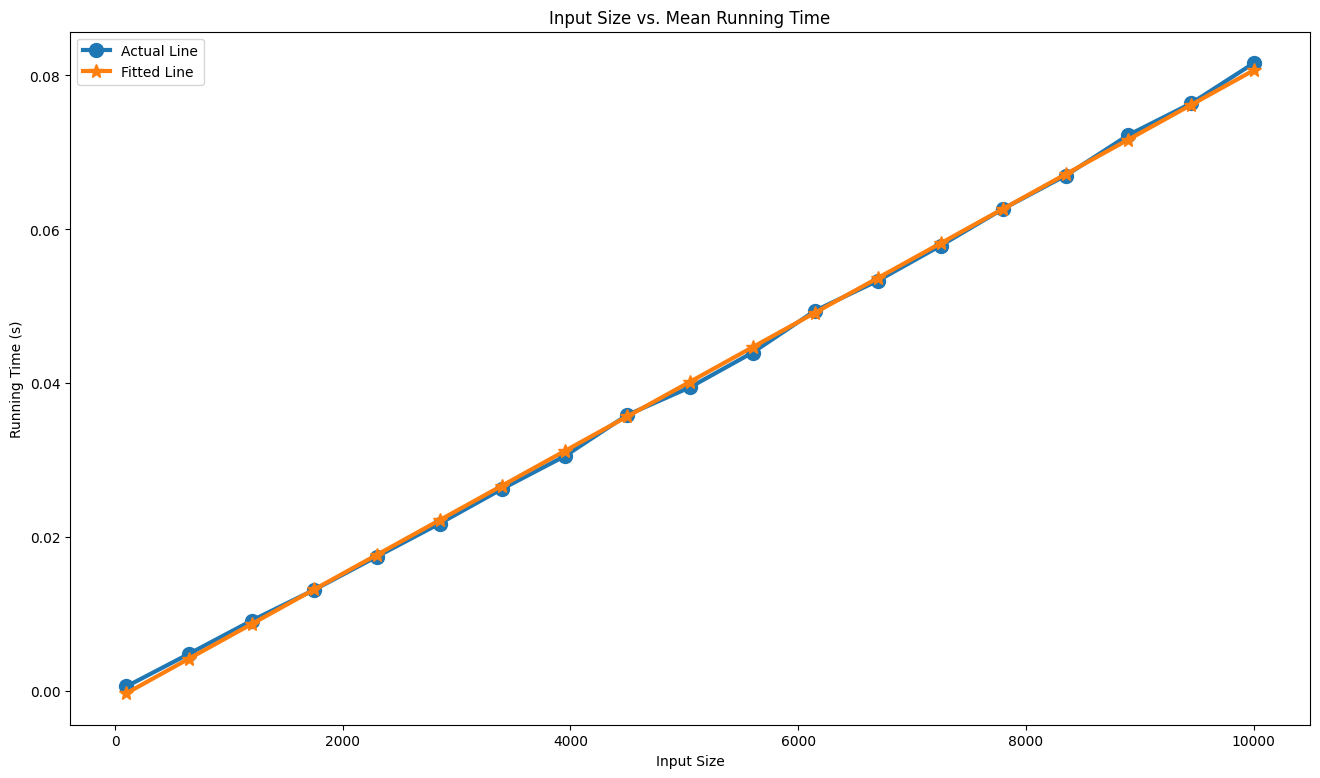

In [5]:
# Convert lists to numpy arrays for easier manipulation
input_sizes = np.array(input_sizes)
mean_running_times = np.array(mean_running_times)
std_running_times = np.array(std_running_times)
confidence_intervals = np.array(confidence_intervals)

# Fit a line to the mean running times using linear regression
params = np.polyfit(input_sizes, mean_running_times, 1)
line_func = np.poly1d(params)

# Plot the mean running times and confidence intervals
plt.figure(figsize = (16,9))
plt.plot(input_sizes, mean_running_times, 'o-', markersize=10, lw = 3)
plt.plot(input_sizes, line_func(input_sizes), "*-", markersize=10, lw = 3)
plt.xlabel('Input Size')
plt.ylabel('Running Time (s)')
plt.legend(labels = ["Actual Line", "Fitted Line"])
plt.title("Input Size vs. Mean Running Time")
plt.show()

In [6]:
# Derive the running time expression based on the equation of the fitted line
running_time_expression = f"{params[1]:.20f} + ({params[0]:.20f}) * Input Size"
print("Running Time Expression:", running_time_expression)

Running Time Expression: -0.00106538250739113141 + (0.00000817311775475218) * Input Size


In [7]:
# Calulate standard Error
standard_errors = std_running_times / num_measurements

# Calculate the degrees of freedom
df = len(mean_running_times) - 1

# Calculate the critical values for the t-distribution
t_critical_90 = t.ppf(1 - (1 - 0.90) / 2, df)
t_critical_95 = t.ppf(1 - (1 - 0.95) / 2, df)

# Calculate the margin of error
margin_of_errors_90 = t_critical_90 * standard_errors
margin_of_errors_95 = t_critical_95 * standard_errors

# Calculate the confidence intervals
confidence_intervals_90 = np.column_stack((mean_running_times - margin_of_errors_90, mean_running_times + margin_of_errors_90))
confidence_intervals_95 = np.column_stack((mean_running_times - margin_of_errors_95, mean_running_times + margin_of_errors_95))

# Create a DataFrame for the table
table_data = {'Input Size': input_sizes,
              'Mean': mean_running_times,
              'Standard Deviation' : std_running_times,
              'Standard Error': standard_errors,
              '90% CI Lower': confidence_intervals_90[:, 0],
              '90% CI Upper': confidence_intervals_90[:, 1],
              '95% CI Lower': confidence_intervals_95[:, 0],
              '95% CI Upper': confidence_intervals_95[:, 1]
             }

# Create the DataFrame
df = pd.DataFrame(table_data)

# Set the Sample column as the index
df.set_index('Input Size', inplace=True)

# Display the table
df

,Mean,Standard Deviation,Standard Error,90% CI Lower,90% CI Upper,95% CI Lower,95% CI Upper
Input Size,,,,,,,
100.0,0.0006329451,0.0001003543,0.0000004014,0.0006322490,0.0006336411,0.0006321017,0.0006337884
650.0,0.0048669643,0.0003156630,0.0000012627,0.0048647748,0.0048691539,0.0048643116,0.0048696171
1200.0,0.0091817665,0.0005746240,0.0000022985,0.0091777808,0.0091857522,0.0091769375,0.0091865955
1750.0,0.0131906290,0.0006462876,0.0000025852,0.0131861462,0.0131951118,0.0131851978,0.0131960602
2300.0,0.0175009584,0.0008152447,0.0000032610,0.0174953037,0.0175066132,0.0174941074,0.0175078095
2850.0,0.0217868748,0.0009173524,0.0000036694,0.0217805118,0.0217932378,0.0217791656,0.0217945839
3400.0,0.0262993040,0.0010667967,0.0000042672,0.0262919044,0.0263067036,0.0262903390,0.0263082690
3950.0,0.0305455189,0.0010532401,0.0000042130,0.0305382133,0.0305528244,0.0305366678,0.0305543700
4500.0,0.0358999395,0.0015196376,0.0000060786,0.0358893989,0.0359104801,0.0358871690,0.0359127101


In [8]:
# b/a
margin_of_errors_90 / mean_running_times

array([0.00109975, 0.00044987, 0.00043409, 0.00033985, 0.00032311,
       0.00029206, 0.00028136, 0.00023917, 0.00029361, 0.00024972,
       0.00023185, 0.00028854, 0.00021449, 0.00021795, 0.00022505,
       0.00023531, 0.00025111, 0.00019414, 0.00019256])

In [9]:
# b/a
margin_of_errors_95 / mean_running_times

array([0.00133242, 0.00054505, 0.00052593, 0.00041175, 0.00039147,
       0.00035384, 0.00034088, 0.00028977, 0.00035573, 0.00030255,
       0.00028089, 0.00034958, 0.00025986, 0.00026406, 0.00027266,
       0.00028509, 0.00030423, 0.00023521, 0.0002333 ])

### Quality Testing

In [10]:
input_sizes = np.linspace(5, 20, 16)

quality = {}

for s in tqdm(input_sizes):
    for _ in range(100):
        sets = random_sized_set_packing_instance(int(s), 30, 10000)
        sets_bf = len(max_set_packing(sets)[0])
        sets_gd = len(greedy_set_packing(sets)[0])
        if str(s) not in quality:
            quality[str(s)] = [float(sets_gd)/sets_bf]
        else:
            quality[str(s)].append(float(sets_gd)/sets_bf)

  0%|          | 0/16 [00:00<?, ?it/s]

In [11]:
means = [np.mean(q) for q in list(quality.values())]

df = pd.DataFrame({"Input Size": input_sizes, "Mean Quality": means})
df["Input Size"] = df["Input Size"].astype("int64")
df = df.set_index("Input Size")

df

,Mean Quality
Input Size,
5,1.0000000000
6,0.9980000000
7,0.9980000000
8,1.0000000000
9,0.9985714286
10,0.9905555556
11,0.9930555556
12,0.9980909091
13,0.9974242424


### Black-Box Testing

In [12]:
sets = [] 
result = greedy_set_packing(sets) 
assert len(result[0]) == 0, "Test case 1 failed"
print("Test case 1 passed successfully!")
print("Set Packing:", result[0])

Test case 1 passed successfully!
Set Packing: []


In [13]:
sets = [
    {1, 2, 3},
    {4, 5, 6},
    {7, 8, 9}
]
result = greedy_set_packing(sets)
assert len(result[0]) == 3, "Test case 2 failed"
print("Test case 2 passed successfully!")
print("Set Packing:", result[0])

Test case 2 passed successfully!
Set Packing: [{1, 2, 3}, {4, 5, 6}, {8, 9, 7}]


In [14]:
sets = [
    {1, 2, 3},
    {2, 3, 4},
    {3, 4, 5},
    {4, 5, 6}
]
result = greedy_set_packing(sets)
assert len(result[0]) == 2, "Test case 3 failed"
print("Test case 3 passed successfully!")
print("Set Packing:", result[0])

Test case 3 passed successfully!
Set Packing: [{1, 2, 3}, {4, 5, 6}]


In [15]:
sets = [
    {1, 2, 3},
    {2, 3},
    {3, 4},
    {4, 5, 6}
]
result = greedy_set_packing(sets)
assert len(result[0]) == 2, "Test case 4 failed"
print("Test case 4 passed successfully!")
print("Set Packing:", result[0])

Test case 4 passed successfully!
Set Packing: [{2, 3}, {4, 5, 6}]


In [16]:
sets = [
    {1, 2, 3},
    {2, 3, 4},
    {2, 3, 4},
    {3, 4, 5}
]
result = greedy_set_packing(sets)
assert len(result[0]) == 1, "Test case 5 failed"
print("Test case 5 passed successfully!")
print("Set Packing:", result[0])

Test case 5 passed successfully!
Set Packing: [{1, 2, 3}]


### White-Box Testing

In [17]:
test_set_1 = []
oracle_1 = []
test_set_2 = [{1, 2}, {3, 4}, {5, 6}]
oracle_2 = [{1, 2}, {3, 4}, {5, 6}]
test_set_3 = [{1, 2}, {2, 3}, {3, 4}]
oracle_3 = [{1, 2}, {3, 4}]
test_set_4 = [{1, 2}, {3, 4}, {4, 5}, {5, 6}]
oracle_4 = [{1, 2}, {3, 4}, {5, 6}]

tests = [[test_set_1, oracle_1], [test_set_2, oracle_2], [test_set_3, oracle_3], [test_set_4, oracle_4]]

for t in tests:
    max_pack = greedy_set_packing(t[0])
    print("Excepted Result:", t[1])
    print("Actual Result:  ", max_pack[0])

Excepted Result: []
Actual Result:   []
Excepted Result: [{1, 2}, {3, 4}, {5, 6}]
Actual Result:   [{1, 2}, {3, 4}, {5, 6}]
Excepted Result: [{1, 2}, {3, 4}]
Actual Result:   [{1, 2}, {3, 4}]
Excepted Result: [{1, 2}, {3, 4}, {5, 6}]
Actual Result:   [{1, 2}, {3, 4}, {5, 6}]
